In [1]:
# Import the libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
#Download the CIFAR10 dataset from keras API

cifar = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()



170498071/170498071 [==============================] - 14s 0us/step


In [3]:
#Check training dataset dimensions
train_images.shape

(50000, 32, 32, 3)

In [4]:
#Check test dataset dimensions
test_images.shape

(10000, 32, 32, 3)

In [5]:
#import libraries to manipulate the dataset
import matplotlib.pyplot as plt
import cv2 
import numpy as np

In [7]:
#Change the labels of the dataset to a more human readable form
labels = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'car')

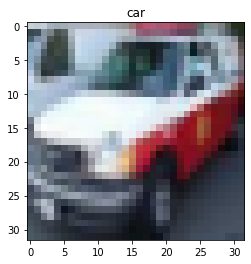

In [15]:
plt.imshow(train_images[60])   # example from the dataset
plt.title(labels[train_labels[60][0]])

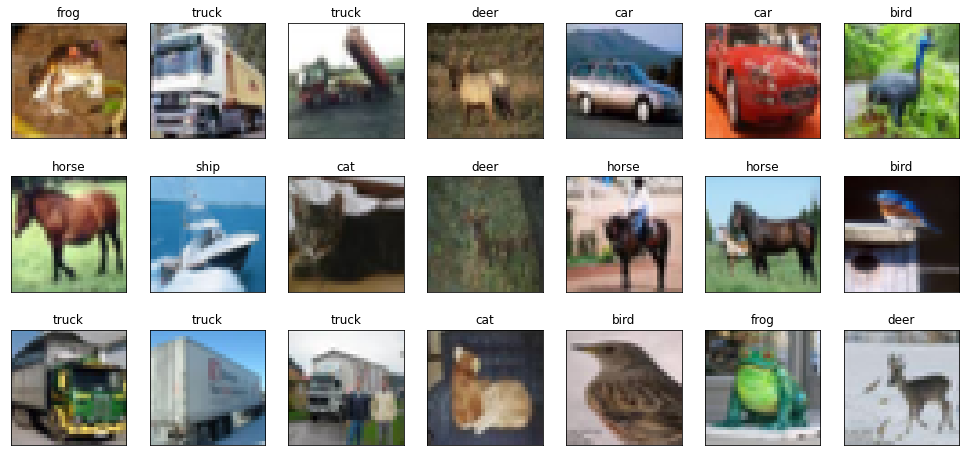

In [ ]:
#Display some image examples next to the labels
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[train_labels[index][0]])
        axes[i,j].imshow(train_images[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [16]:
#Convert dataset to black and white

train_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

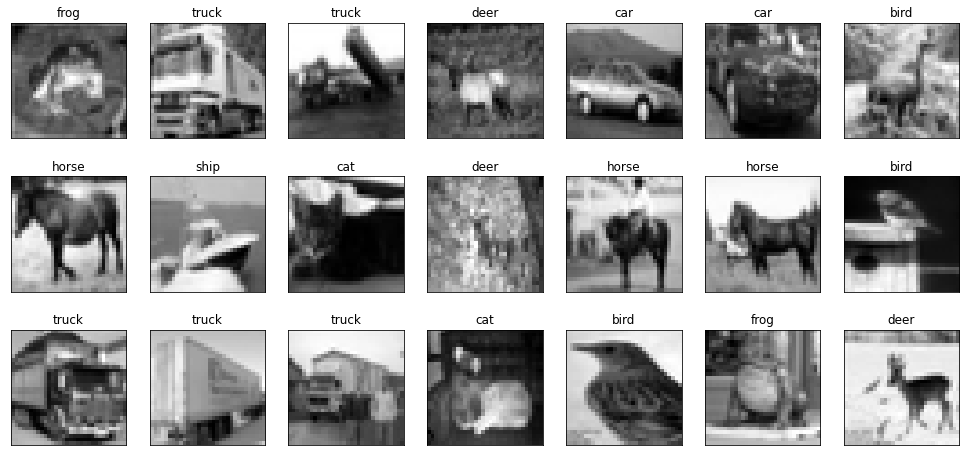

In [17]:
# Plot converted images

fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[train_labels[index][0]])
        axes[i,j].imshow(train_images[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [18]:
# Define model for testing

model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 1)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
    
    
    
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')                                                 
])

In [19]:
# Print model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dense (Dense)               (None, 15, 15, 256)       16640     
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        147520    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [20]:
# Compile model

model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train model to 10 epochs

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 17s 6ms/step - loss: 1.9931 - accuracy: 0.3063
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3244 - accuracy: 0.5406
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0750 - accuracy: 0.6311
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9457 - accuracy: 0.6728
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8314 - accuracy: 0.7129
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7497 - accuracy: 0.7414
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6594 - accuracy: 0.7713
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5809 - accuracy: 0.7983
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5129 - accuracy: 0.8228
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4

In [22]:
#Evaluate performance

model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.3165 - accuracy: 0.6568


[1.3165069818496704, 0.6567999720573425]

In [23]:
# Create callback to halt raining after 80% accuracy is acheived

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 80 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''
    if (logs.get("accuracy") > 0.8):
      print("\nThe accuracy thresholf of 80% has been reached, training is terminating")
      self.model.stop_training = True

#instantiate the class
callback = myCallback()

In [24]:
#Re-run training without resetting weights to quickly test callback works correctly
model.fit(train_images, train_labels, epochs = 10, callbacks=[callback])

Epoch 1/10
1555/1563 [============================>.] - ETA: 0s - loss: 0.3886 - accuracy: 0.8638
The accuracy thresholf of 80% has been reached, training is terminating
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3891 - accuracy: 0.8636
